## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [79]:
# Checking the number of mice.
len(mouse_df['Mouse ID'])

1893

In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [113]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_df['Duplicated'] = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mouse_df = mouse_df[mouse_df['Duplicated'] == True]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [142]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedrug_df = clean_mouse_df.drop_duplicates(subset=['Mouse ID'])

In [143]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].nunique()

249

## Summary Statistics

In [261]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_median = mousedrug_df[['Tumor Volume (mm3)']].median()
mice_mean = mousedrug_df[['Tumor Volume (mm3)']].mean()
mice_mode = mousedrug_df['Tumor Volume (mm3)'].mode()[0]

quartiles = mousedrug_df[['Tumor Volume (mm3)']].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# This method is the most straighforward, creating multiple series and putting them all together at the end.



45.0


In [262]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = mousedrug_df.groupby('Drug Regimen')
# This method produces everything in a single groupby function
sumstats = grouped_regimen[['Tumor Volume (mm3)']].describe()


## Bar and Pie Charts

Text(0, 0.5, 'Count')

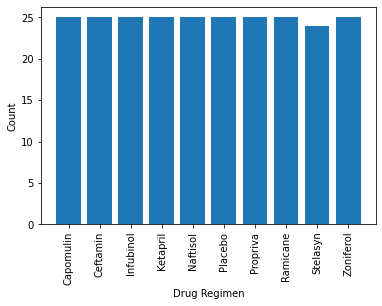

In [273]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plt.bar(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])

s_ = pd.Series(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])
s_.plot

plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

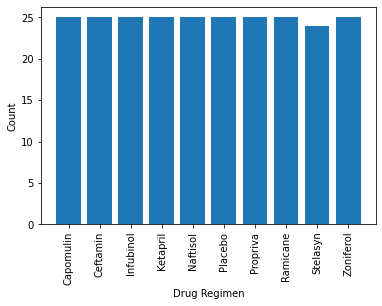

In [274]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Count')

In [275]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [276]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [277]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [278]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [279]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [280]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [281]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [282]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
